In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from loaddatastructs import *
from helperfuncs import *
from plottingfuncs import *

Nicole Recommendations:
- Running same simulation but without ammonia: current results are heavily reliant on nitrate and availabiity of ammonia
  - Answers the question: how sensitive are CCN activity to presence of ammonia? Decoupling conclusions of CCN activity due to SH and emissions composition
  - Start with 100% sulfate aerosol, no ammonia emissions

In [13]:
#matplotlib.rcParams.update({'font.size': 13})

In [14]:
def computeNumConcDiff(scenario, region):
    num_conc = Archive.aero_data[scenario]['TOT_NUM_CONC']

    if region=='lower BL':
        idx_range = np.arange(0,25)
    if region=='above BL':
        idx_range = np.arange(75,100)
    num_conc_avg = num_conc[:, idx_range, :, :].mean(axis=(2,3))
    num_conc_t0 = num_conc_avg[0, :]
    num_conc_diff = num_conc_avg/ num_conc_t0
    return num_conc_diff

def plotTauCoag(scenario, **kwargs):
    
    colors = plt.cm.Set1(np.linspace(0, 1, 9))
    fig, ax = plt.subplots(1,1, figsize=(8, 5.5))

    c=colors[0]
    num_conc_diff = computeNumConcDiff(scenario, region='lower BL')
    for i in np.arange(0, 25):
        label=None
        if i == 0:
            label='Lower BL'
        ax.plot(num_conc_diff[:, i], alpha=.3, c=c,lw=1,label=label)
    c=colors[1]
    num_conc_diff = computeNumConcDiff(scenario, region='above BL')
    for i in np.arange(0, 25):
        label=None
        if i == 0:
            label='Above BL'
        ax.plot(num_conc_diff[:, i], alpha=.5, c=c,lw=1,label=label)


    ax.axhline(1/(np.e), c='k', ls='--')
    ax.axhline(1/(np.sqrt(np.e)), c='k', ls='--')
    ax.axhline(1/(np.e**2), c='k', ls='--')
    ax.set_ylim(0.0, 1)
    ax.set_xlim(0, 36)
    ax.grid()

    ax.text(38, 1/np.sqrt(np.e), '$e^{-1/2}$', fontsize=18, horizontalalignment='center',
        verticalalignment='center',)
    ax.text(38, 1/np.e, '$e^{-1}$', fontsize=18, horizontalalignment='center',
        verticalalignment='center')
    ax.text(38, 1/np.e**2, '$e^{-2}$', fontsize=18, horizontalalignment='center',
        verticalalignment='center')
    
    ax.set_xticks(np.linspace(0, Archive.n_times-1, 7))
    ax.set_xticklabels(Archive.historydelta_m*np.linspace(0, Archive.n_times-1, 7))
    ax.set_xlabel('Time (m)')
    leg = ax.legend()

    for line in leg.get_lines():
        line.set_linewidth(2)
        line.set_alpha(1) 
    
    if kwargs.get('yscale'):
        ax.set_yscale(kwargs.get('yscale'))
    if kwargs.get('ylim'):
        ax.set_ylim(kwargs.get('ylim'))
    if kwargs.get('xscale'):
        ax.set_xscale(kwargs.get('xscale'))
    if kwargs.get('xlim'):
        ax.set_xlim(kwargs.get('xlim'))


    scenarios = Archive.getScenarioList()
    scenarios.insert(3, 'road-10x') # order by sh
    del scenarios[-1]

    scenario_idx = scenarios.index(scenario)
    #plt.savefig(f'./figures/NumConcTimescale_scenario-{scenario_idx}.pdf', format='pdf', bbox_inches='tight')

def plotSHPattern(ax, scenario, gridsize):
    path = f'/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/spatial-het/sh-patterns/xres{gridsize}yres{gridsize}'

    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(path, filename)
    cmap = plt.cm.get_cmap('Greys')

    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scenario_arr = scenario_arr
    ax.pcolormesh(scenario_arr, cmap=cmap, vmin=-.3, vmax=1.3)

In [2]:
Archive.archive_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'
Archive.gridsize = 100

Archive.addScenario(scenario_name='uniform-basecase', slurm_id=1984671)
Archive.addScenario(scenario_name='fx1fy0', slurm_id=1996526)
Archive.addScenario(scenario_name='road-10x', slurm_id=1996525)
Archive.addScenario(scenario_name='point-source-1x1', slurm_id=1984672)

# Scenarios to evaluate ccn activity in complete absence of ammonia
Archive.addScenario(scenario_name='uniform-basecase-no-nh4', slurm_id=2008005)
Archive.addScenario(scenario_name='point-source-1x1-no-nh4', slurm_id=2008006)



In [6]:
Archive.aero_data['uniform-basecase']['TEMPERATURE'][36, :, :, :].mean(axis=(1,2))

masked_array(data=[306.758  , 306.2659 , 305.9203 , 305.6532 , 305.42514,
                   305.21515, 305.01437, 304.81894, 304.62674, 304.4365 ,
                   304.24756, 304.0595 , 303.8721 , 303.6851 , 303.4982 ,
                   303.31128, 303.12424, 302.9372 , 302.7502 , 302.56314,
                   302.37604, 302.1887 , 302.00082, 301.8124 , 301.62363,
                   301.43475, 301.24594, 301.05725, 300.8687 , 300.68024,
                   300.4916 , 300.30276, 300.11362, 299.9241 , 299.73434,
                   299.54422, 299.3539 , 299.16354, 298.9732 , 298.78296,
                   298.59265, 298.40222, 298.2117 , 298.0212 , 297.8308 ,
                   297.64035, 297.44974, 297.25894, 297.06827, 296.8778 ,
                   296.68756, 296.4977 , 296.308  , 296.1186 , 295.92944,
                   295.7404 , 295.5518 , 295.36456, 295.17966, 294.99786,
                   294.81998, 294.64734, 294.48056, 294.31985, 294.16727,
                   294.0247 , 293.8957

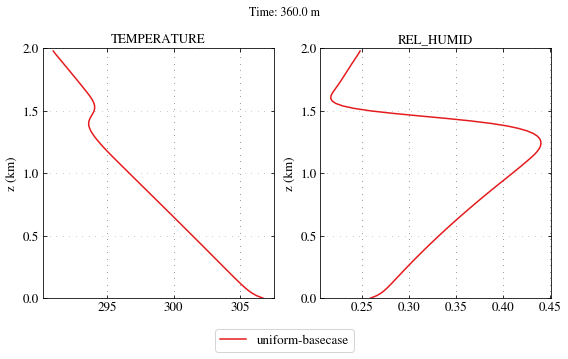

In [5]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase'], variables=['TEMPERATURE', 'REL_HUMID'], time=36)

Latent heat flux $\overline{w'\theta'}$: per the readme, "A sign of well-established
turbulence is that the total (i.e., the resolved-scale plus the
subgrid-scale) heat flux profile should decrease linearly with height
within the CBL."

In [4]:
#data = aerodata_dict['basecase']['aerodata']
data = Archive.aero_data['uniform-basecase']
hflx = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['T'][t, z, :, :] # perturbation potential temperature (relative to 300 K)
        B_data = data['W'][t, z, :, :] # vertical velocity

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        hflx[t, z] = (A_prime*B_prime).mean(axis=(0,1))

In [20]:
tmax=6
colors = plt.cm.Blues(np.linspace(.1, 1, tmax+1))
fig, ax = plt.subplots(1,1, figsize=(8, 6))

for t in range(tmax+1)[:]:
    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(hflx[t, :], np.arange(100), label=f'$t={Archive.historydelta_m*t:2.0f}$ m', c=c)
ax.axvline(x=0, c='#505050', ls='--', lw=1.2, zorder=2, dashes=(5, 5))
ax.legend()
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_xlim(-.4, .4)
ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("$\\overline{w'\\theta}'\mathrm{\ [K\ m\ s^{-1}]}$", fontsize=15)
ax.legend(fontsize=12)

ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
plt.savefig('heat-flux-profile.pdf', format='pdf', bbox_inches='tight')

TKE

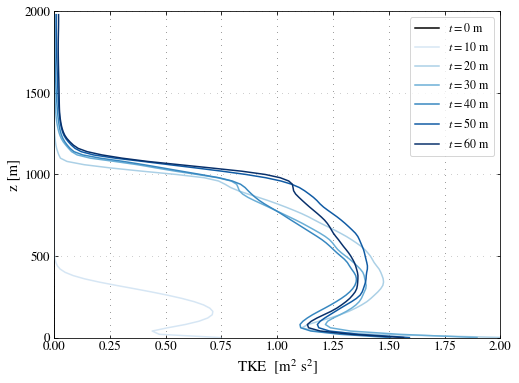

In [ ]:
data = Archive.aero_data['uniform-basecase']

fig, ax = plt.subplots(1,1, figsize=(8, 6))
colors = plt.cm.Blues(np.linspace(0, 1, 7))
for t in np.arange(0, 7, 1):
    sigma_u = data['U'][t, :, :, :].std(axis=(1,2))
    sigma_v = data['V'][t, :, :, :].std(axis=(1,2))
    sigma_w = data['W'][t, :, :, :].std(axis=(1,2))[:-1]

    specific_tke = (1/2)*(sigma_u**2 + sigma_v**2 + sigma_w**2) 
    e = np.sqrt(2*specific_tke)

    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(specific_tke, np.arange(100), label=f'$t = {Archive.historydelta_m*t:3.0f}$ m', c=c)
ax.set_xlim(0, 2)
leg = ax.legend(loc='center', ncol=2, bbox_to_anchor=(.5, .87), handlelength=1)

ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("TKE $\mathrm{\ [m^2\ s^2]}$", fontsize=15)
ax.legend(fontsize=12)

ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
plt.savefig('tke-profile.pdf', format='pdf', bbox_inches='tight')


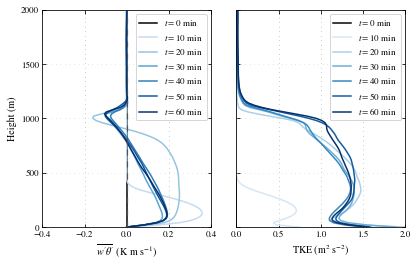

In [14]:
tmax=6
colors = plt.cm.Blues(np.linspace(.1, 1, tmax+1))
fig, axs = plt.subplots(1,2, figsize=(6.5, 4), sharey=True)
plt.subplots_adjust(wspace=0.15)

ax = axs[0]
for t in range(tmax+1)[:]:
    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(hflx[t, :], np.arange(100), label=f'$t={Archive.historydelta_m*t:2.0f}$ min', c=c)
ax.axvline(x=0, c='#505050', ls='--', lw=1.2, zorder=2, dashes=(5, 5))
ax.legend()
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_xlim(-.4, .4)
ax.set_ylabel('Height (m)', fontsize=10)
ax.set_xlabel("$\\overline{w'\\theta}'$ $\mathrm{(K\ m\ s^{-1})}$", fontsize=10)
ax.legend(fontsize=9)

ax.grid(which = "major", linewidth = .7, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = .7, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = .7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = .7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=9, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
#plt.savefig('heat-flux-profile.pdf', format='pdf', bbox_inches='tight')


ax = axs[1]
colors = plt.cm.Blues(np.linspace(0, 1, 7))
for t in np.arange(0, 7, 1):
    sigma_u = data['U'][t, :, :, :].std(axis=(1,2))
    sigma_v = data['V'][t, :, :, :].std(axis=(1,2))
    sigma_w = data['W'][t, :, :, :].std(axis=(1,2))[:-1]

    specific_tke = (1/2)*(sigma_u**2 + sigma_v**2 + sigma_w**2) 
    e = np.sqrt(2*specific_tke)

    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(specific_tke, np.arange(100), label=f'$t = {Archive.historydelta_m*t:3.0f}$ min', c=c)
ax.set_xlim(0, 2)
leg = ax.legend(loc='center', ncol=2, bbox_to_anchor=(.5, .87), handlelength=1)

ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
#ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("TKE $\mathrm{(m^2\ s^{-2})}$", fontsize=10)
ax.legend(fontsize=9)

ax.grid(which = "major", linewidth = .7, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = .7, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = .7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = .7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=9, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
#plt.tight_layout()
plt.savefig('heat-flux-and-tke-profile.pdf', format='pdf', bbox_inches='tight')


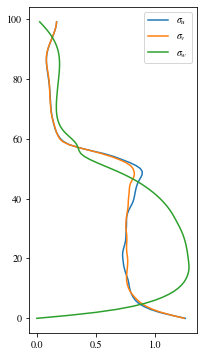

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3, 6))
ax.plot(sigma_u,np.arange(100), label='$\sigma_u$')
ax.plot(sigma_v,np.arange(100), label='$\sigma_v$')
ax.plot(sigma_w,np.arange(100), label='$\sigma_w$')
ax.legend()

Segregation intensity $I_s$

In [ ]:
data = Archive.aero_data['uniform-basecase']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['pmc_NO3'][t, z, :, :]
        B_data = data['pmc_SO4'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))

for t in range(24):
    for z in range(100):
        A_data = data['pmc_NO3'][t, z, :, :]
        B_data = data['pmc_SO4'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
scenario = 'point-source-1x1'
variable = 'so2'
nsh_array = calculateNSHTimeSlice(scenario, variable)


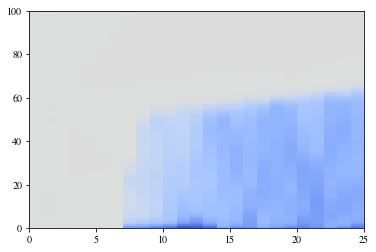

In [ ]:
data = Archive.aero_data['point-source-1x1']

Is = np.zeros((25, 100))

for t in range(25):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
plt.pcolormesh(nsh_array.T)
plt.colorbar()

In [ ]:
nsh_arr_flat = nsh_array.flatten()
Is_flat = Is.flatten()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(nsh_arr_flat, Is_flat, s=7)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylabel('$I_s$', fontsize=16)
ax.set_xlabel('$SH_{atmos}}$',fontsize=16)
ax.set_title('$I_s$ (OH & SO$_2$) vs. $SH_{atmos}$ (SO$_2$)', fontsize=18)
#plt.savefig(f'SegIntens_vs_SH_SO2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
scenario = 'point-source-10x10'
variable = 'no2'
nsh_array = calculateNSHTimeSlice(scenario, variable)

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((25, 100))

for t in range(25):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)


In [ ]:
nsh_arr_flat = nsh_array.flatten()
Is_flat = Is.flatten()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(nsh_arr_flat, Is_flat, s=7)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylabel('$I_s$', fontsize=16)
ax.set_xlabel('$SH_{atmos}}$',fontsize=16)
ax.set_title('$I_s$ (OH & NO$_2$) vs. $SH_{atmos}$ (NO$_2$)', fontsize=18)
plt.savefig(f'SegIntens_vs_SH_NO2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
c = ax.pcolormesh(1000*basecase_data['so2'][16, 25, :, :])
plt.colorbar(c, ax=ax)

In [ ]:
data = Archive.aero_data['point-source-10x10-tchem60']
fig, ax = plt.subplots(1, 1, figsize=(7,6))
#vmin = 0.1
#vmax=12
c = ax.pcolormesh(1000*data['oh'][24, 25, :, :], )#vmin=0, vmax=12)
#norm=mplcolors.LogNorm(vmin, vmax))
plt.colorbar(c, ax=ax)

In [ ]:
data = Archive.aero_data['uniform-basecase']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = aerodata_dict['basecase']['aerodata']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
fig, ax  = plt.subplots(1,1, figsize=(8,5.5))

variable = 'ccn_006' #'TOT_COAGULATION_NUM_CONC'
scenarios = [
             'basecase', 
             'point-source-10x10', 
             'point-source-10x10-tchem60'
             ]
mixingratio = True
zlevel = 25

for scenario in scenarios:
    times = np.arange(n_times)
    varmean_array = np.zeros((n_times))
    varstd_array = np.zeros((n_times))
    for itime in times:
        if mixingratio:
            inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][itime, zlevel, :, :]
            level_array = inverse_airdens*aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
        else:
            level_array = aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
        if variable in gas_vars:
            level_array = 1000*level_array
            if variable == 'oh':
                level_array = 1000*level_array
        varmean_array[itime] = level_array.mean()
        varstd_array[itime] = level_array.std()
        

    ax.plot(times, varmean_array, label = scenario)
    ax.fill_between(times, varmean_array-varstd_array, varmean_array+varstd_array, alpha=.3)

if mixingratio:
    var_units = 'Mixing Ratio'
else:
    var_units = 'Concentration'

#cbar = fig.colorbar(cs, label=f'{variable} {var_units}')
ax.legend(loc='upper left')
ax.set_xlabel('Time (mins)', fontsize=12)
ax.set_ylabel(f'{var_units}', fontsize=12)
ax.set_xticks(np.linspace(0, n_times-1, 13))
ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
#ax.set_yscale('log')
ax.set_title(f'{variable}')
plt.suptitle(f'Z-level: {zlevel}')
plt.tight_layout()


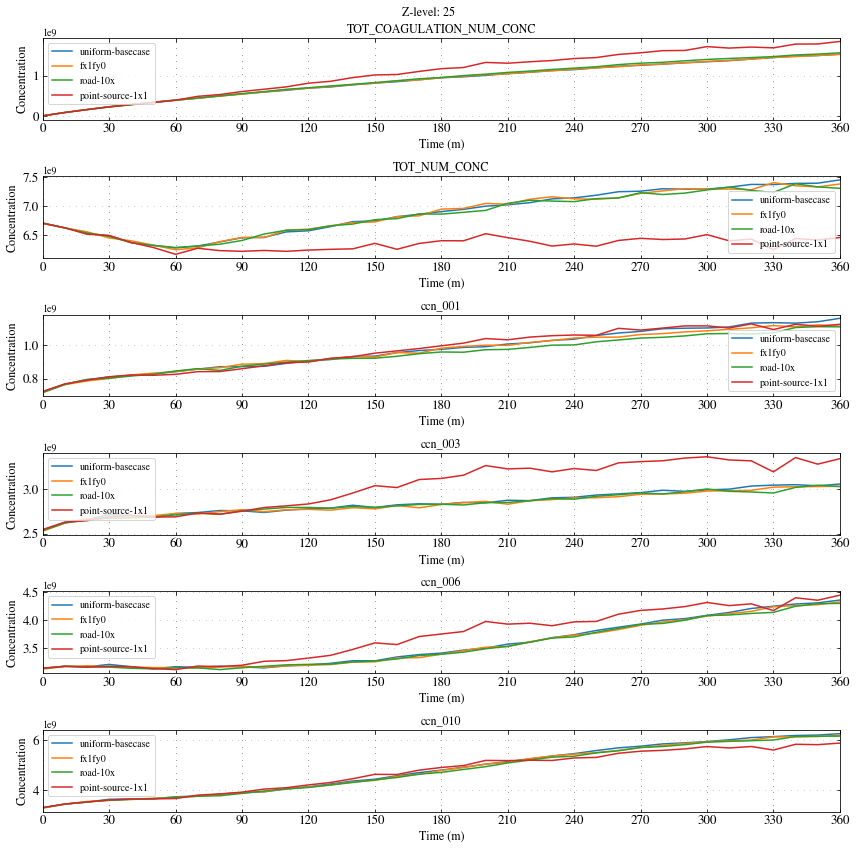

In [ ]:
scenarios = [
             'uniform-basecase', 
             'fx1fy0',
             'road-10x',
             'point-source-1x1'
             #'point-source-10x10', 
             #'point-source-10x10-tchem60'
             ]
variables = ['TOT_COAGULATION_NUM_CONC', 'TOT_NUM_CONC',
'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010']
mixingratio = False
zlevel = 25
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio,
                           subplot_height=2,
                           #general_scenario_label=True
                           #xtick_delta_t=1, xtick_units='h')
                            )

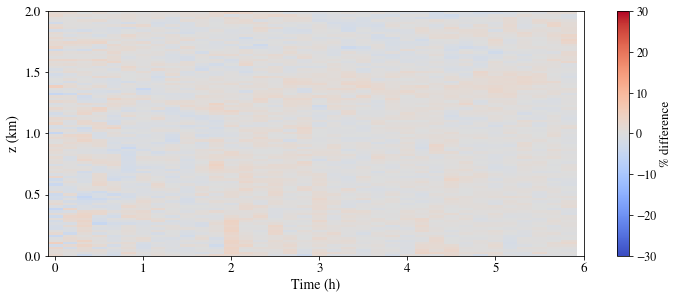

In [ ]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'fx1fy0'
plotVarPercentDiff(scenario, variable, vmin=-30, vmax=30, skip_t0=True,
                   xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, plot_significance=True, savefig=True)

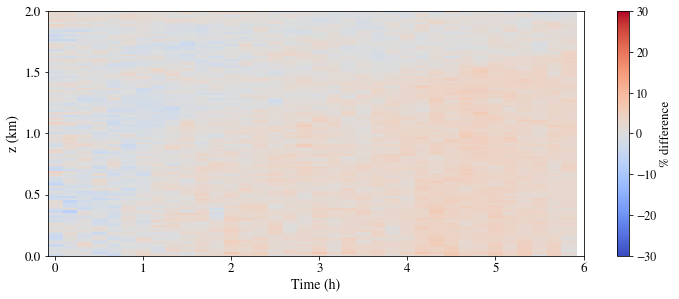

In [ ]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'road-10x'
plotVarPercentDiff(scenario, variable, vmin=-30, vmax=30, skip_t0=True,
                   xtick_delta_t=1, xtick_units='h', title='',
                   #plot_contours=True, n_contours=3, contour_min=-3, contour_max=3, 
                   mixingratio=True, #plot_significance=True, 
                   savefig=True)

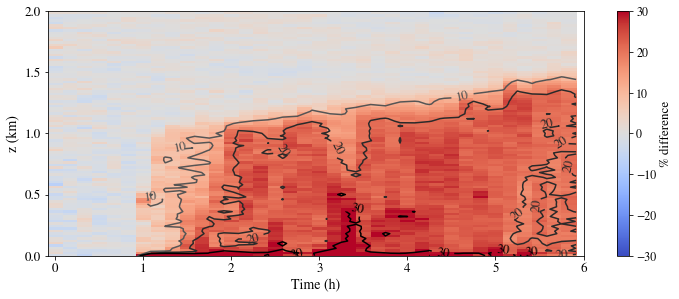

In [ ]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-30, vmax=30, skip_t0=True,
                   xtick_delta_t=1, xtick_units='h', title='',
                   plot_contours=True, n_contours=7, contour_min=-30, contour_max=30, 
                   mixingratio=True, #plot_significance=True, 
                   savefig=True)

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:77: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'),


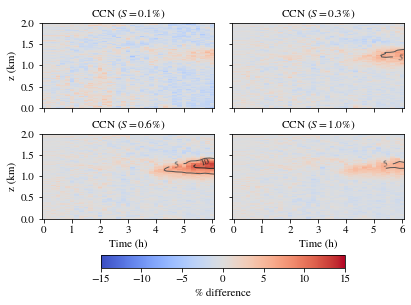

In [5]:
scenario = 'fx1fy0'
vmin = -15
vmax = 15

plotCCNPercentDiff(scenario, vmin, vmax, 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=7, contour_min=-15, contour_max=15, contour_label_fontsize=9, 
                   smooth_contours=True, contour_smoothing_sigma=.6, contour_linewidth=1,
                   xtick_delta_t=1, xtick_units='h', title='',
                   savefig=True
                   )

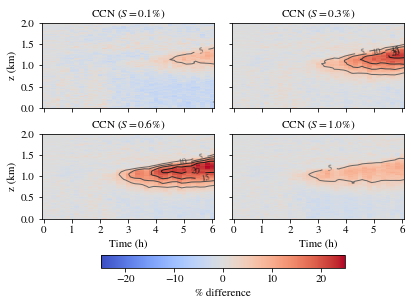

In [4]:
scenario = 'road-10x'
vmin = -25
vmax = 25

plotCCNPercentDiff(scenario, vmin, vmax, 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=11, contour_min=-25, contour_max=25, contour_label_fontsize=9, 
                   smooth_contours=True, contour_smoothing_sigma=.6, contour_linewidth=1,
                   xtick_delta_t=1, xtick_units='h', title='',
                   savefig=True
                   )

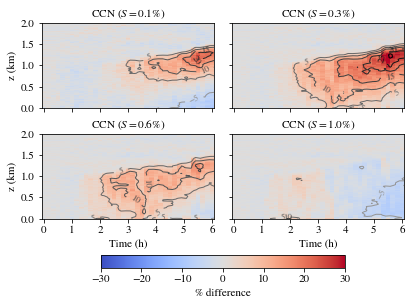

In [3]:
scenario = 'point-source-1x1'
vmin = -30
vmax = 30

plotCCNPercentDiff(scenario, vmin, vmax, 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, contour_label_fontsize=9, 
                   smooth_contours=True, contour_smoothing_sigma=.6, contour_linewidth=1,
                   xtick_delta_t=1, xtick_units='h', title='',
                   savefig=True
                   )

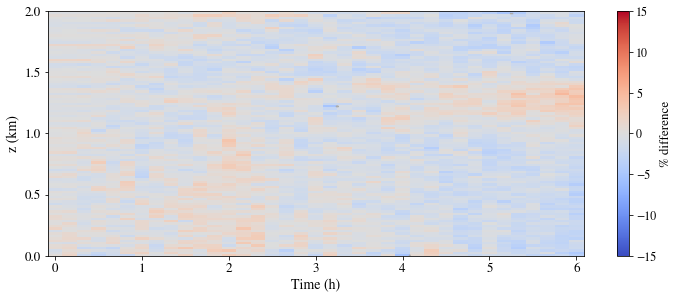

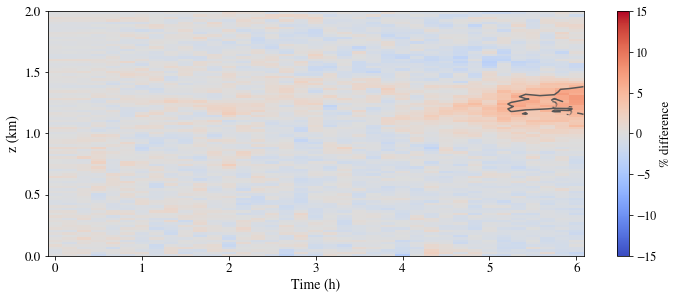

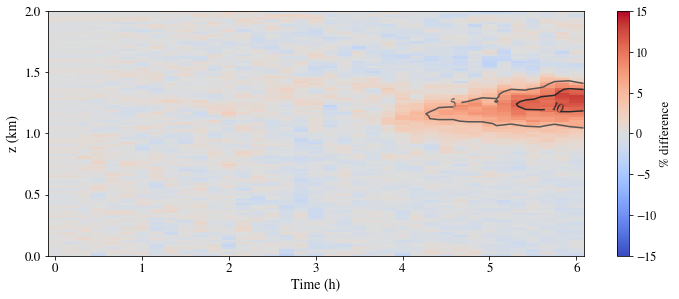

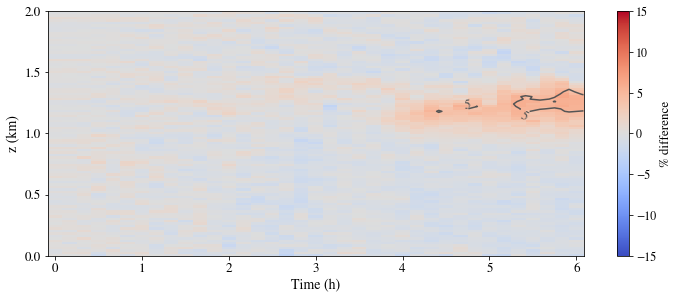

In [ ]:
scenario = 'fx1fy0'
#scenario = 'road-10x'
#scenario = 'point-source-1x1'

vmin = -15
vmax = 15

variable = 'ccn_001'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=7, contour_min=-15, contour_max=15, 
                   xtick_delta_t=1, xtick_units='h', title='',
                   savefig=True
                   )

variable = 'ccn_003'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                   xtick_delta_t=1, xtick_units='h', title='', 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=7, contour_min=-15, contour_max=15, 
                   savefig=True)

variable = 'ccn_006'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                    xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=7, contour_min=-15, contour_max=15, 
                   savefig=True)

variable = 'ccn_010'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                    xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=7, contour_min=-15, contour_max=15, 
                   savefig=True)

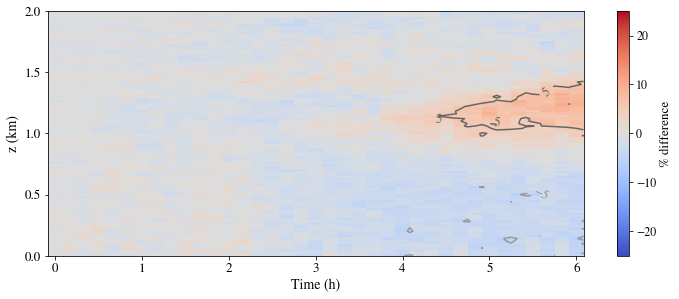

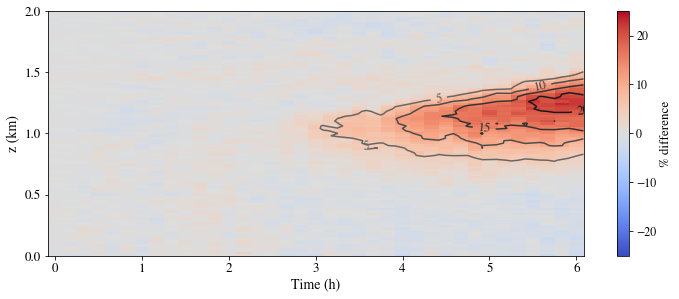

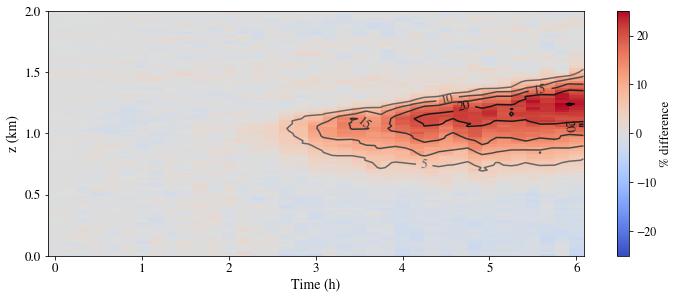

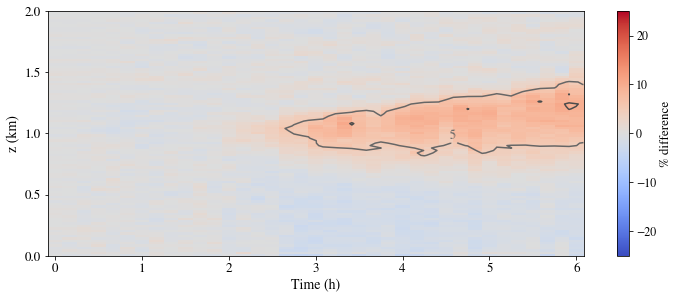

In [ ]:
#scenario = 'fx1fy0'
scenario = 'road-10x'
#scenario = 'point-source-1x1'

vmin = -25
vmax = 25

variable = 'ccn_001'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=11, contour_min=-25, contour_max=25,
                   xtick_delta_t=1, xtick_units='h', title='',
                   savefig=True
                   )

variable = 'ccn_003'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                   xtick_delta_t=1, xtick_units='h', title='', 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=11, contour_min=-25, contour_max=25,
                   savefig=True)

variable = 'ccn_006'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                    xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=11, contour_min=-25, contour_max=25,
                   savefig=True)

variable = 'ccn_010'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                    xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=11, contour_min=-25, contour_max=25, 
                   savefig=True)

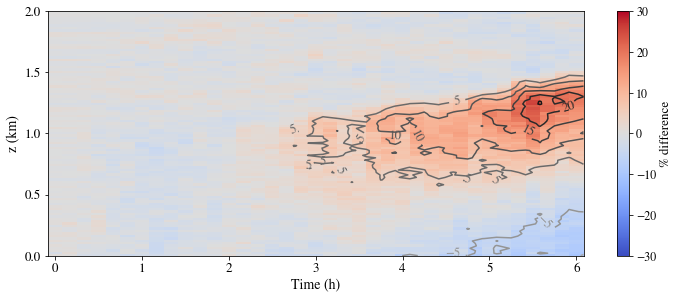

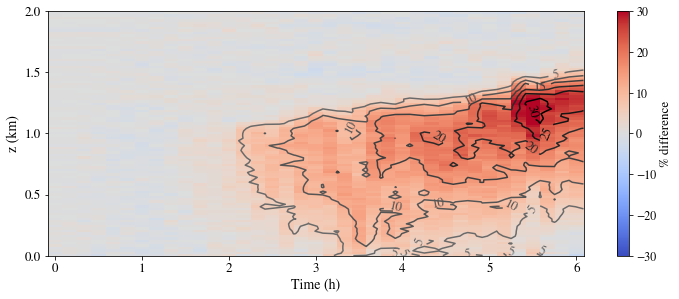

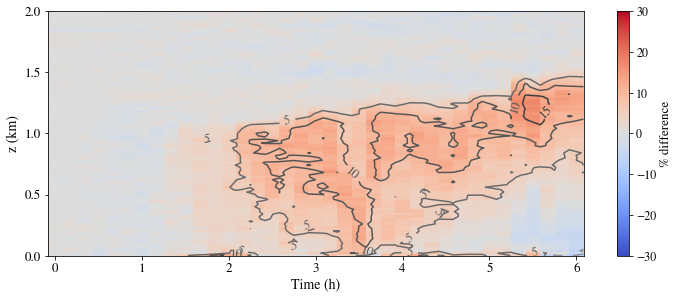

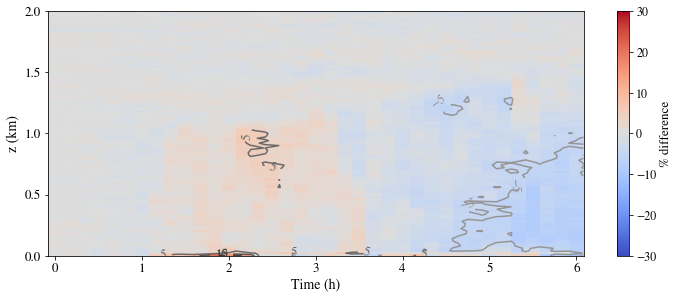

In [ ]:
#scenario = 'fx1fy0'
#scenario = 'road-10x'
scenario = 'point-source-1x1'

vmin = -30
vmax = 30

variable = 'ccn_001'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, 
                   xtick_delta_t=1, xtick_units='h', title='',
                   savefig=True
                   )

variable = 'ccn_003'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                   xtick_delta_t=1, xtick_units='h', title='', 
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, 
                   savefig=True)

variable = 'ccn_006'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                    xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, 
                   savefig=True)

variable = 'ccn_010'
plotVarPercentDiff(scenario, variable, vmin, vmax, 
                    xtick_delta_t=1, xtick_units='h', title='',
                   mixingratio=True, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, 
                   savefig=True)

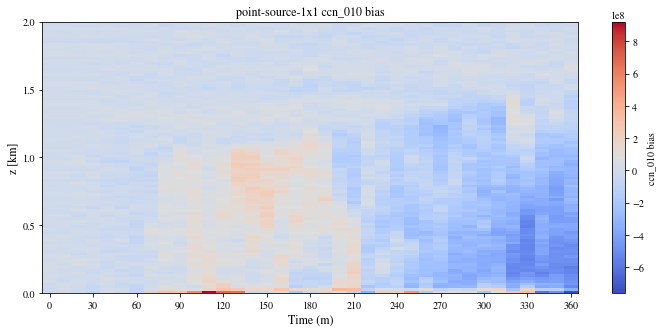

In [ ]:
plotVarBias('point-source-1x1', 'ccn_010')

In [ ]:
variable = 'ccn_001'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

variable = 'ccn_003'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)    

variable = 'ccn_006'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

variable = 'ccn_010'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

Less OH to react with H2SO4, reacting with many VOCs

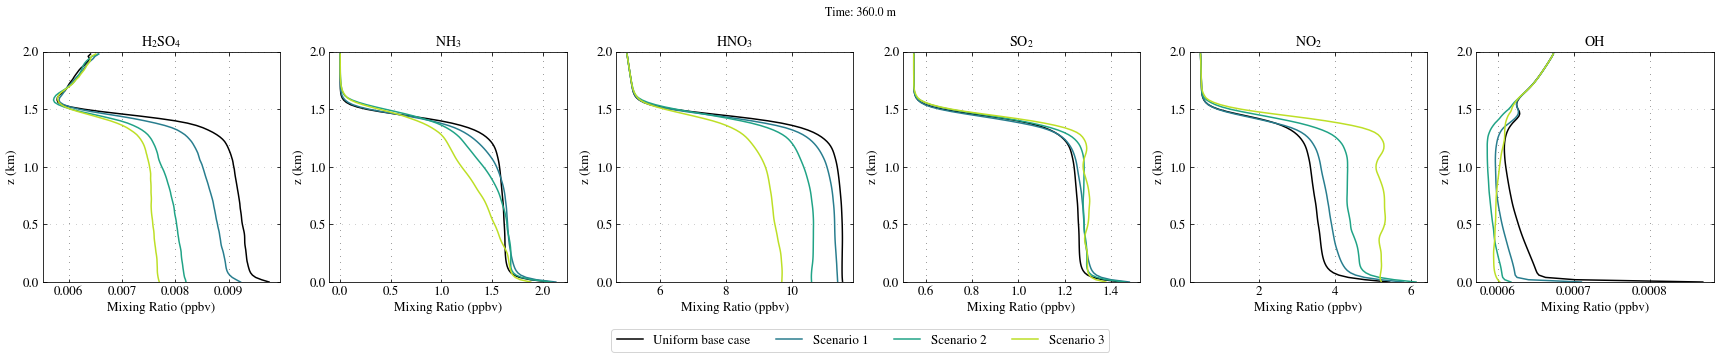

In [ ]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'#'point-source-10x10', 'point-source-10x10-tchem60', 
                                            ], variables=['h2so4', 'nh3', 'hno3', 'so2', 'no2', 'oh'], time=36,
                                            use_standard_scenario_colors=True,
                                            general_scenario_label=True
                                            )

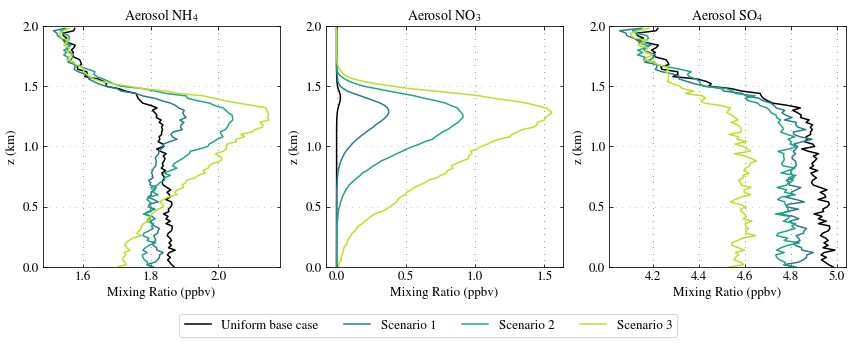

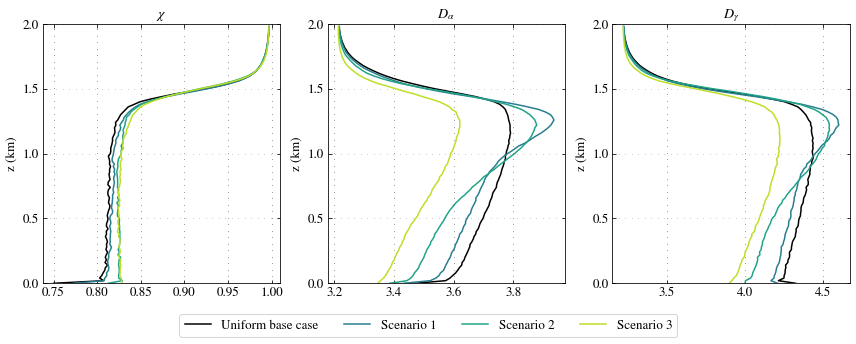

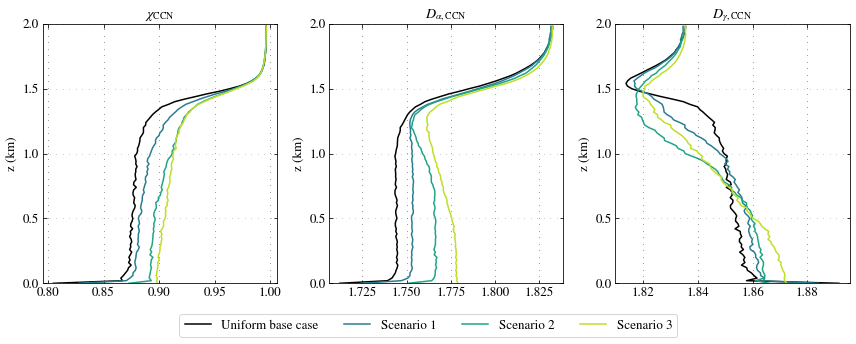

In [3]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', #'pmc_H2O', 
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 savefig=True,
                                 filename=f'aerosol-SNA-vertical-profiles-time{t}.pdf'
                                 )

plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['CHI', 'D_ALPHA', 'D_GAMMA'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 savefig=True,
                                 filename=f'aerosol-mixingstate-vertical-profiles-time{t}.pdf'
                                 )
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['CHI_CCN', 'D_ALPHA_CCN', 'D_GAMMA_CCN'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 savefig=True,
                                 filename=f'aerosol-ccn-mixingstate-vertical-profiles-time{t}.pdf'
                                 )

$D_{\gamma}$: bulk diversity (how many species are there in the bulk population)
$D_{\alpha}$: per-particle diversity (how many species are in each particle)

In [4]:
Archive.getScenarioColors()

{'uniform-basecase': 'k',
 'uniform-basecase=no-nh4': '#440256',
 'fx2fy2': '#287d8e',
 'fx1fy0': '#20a386',
 'road-10x': '#58c765',
 'point-source-10x10': '#bddf26',
 'point-source-1x1': '',
 'point-source-1x1-no-nh4': ''}

KeyError: 'uniform-basecase-no-nh4'

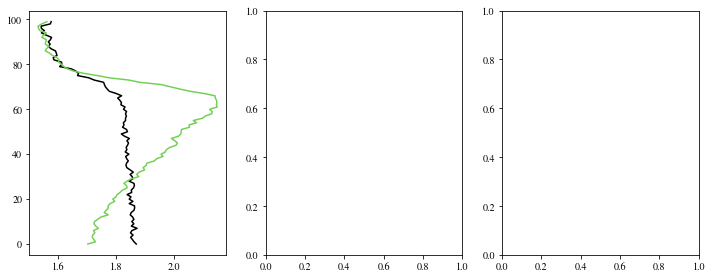

In [5]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1', 'uniform-basecase-no-nh4', 'point-source-1x1-no-nh4'
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', #'pmc_H2O', 
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 savefig=False,
                                 filename=f'aerosol-SNA-vertical-profiles-no-nh4-cases-time{t}.pdf'
                                 )

Also show total number concentration on these vertical profiles of CCN

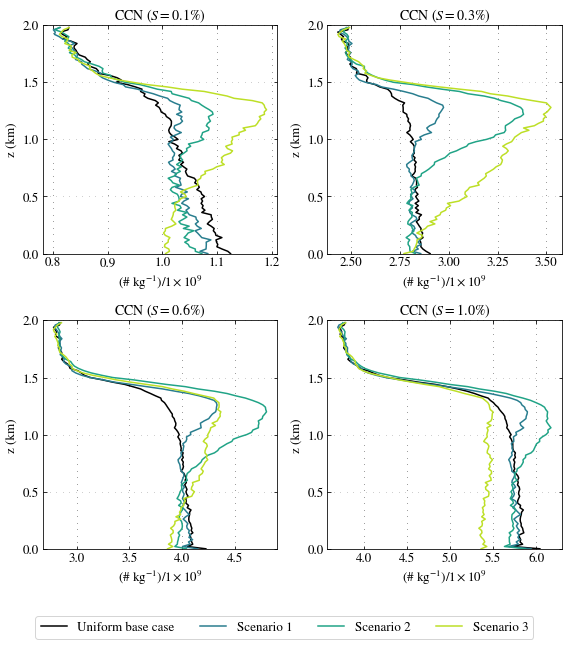

In [4]:
t=36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'#'point-source-10x10','point-source-10x10-tchem60', 
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 unit_prefactor=1e-9,
                                 time=36, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 savefig=True,
                                 filename=f'aerosol-ccn-vertical-profiles-time{t}.pdf'
                                 )

This show that **the impact of spatial heterogeneity on CCN activity is highly sensitive to the composition of the aerosol and gas-phase**. The presence of ammonia amplifies this phenomenon, as we can see considerable differences between the activity of ccn in the uniform basecase (blue) compared with the point source 1x1 (orange), whereas comparable simulations without any ammonia exhibit far less difference in ccn activity at each supersaturation level. 

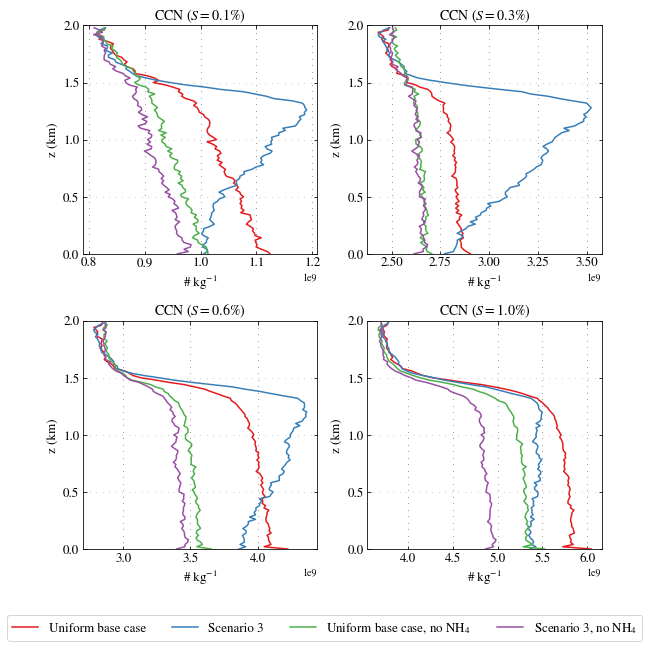

In [6]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1', 'uniform-basecase-no-nh4', 'point-source-1x1-no-nh4'
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 time=36, 
                                 general_scenario_label=True,
                                 title='',
                                 savefig=True,
                                 filename=f'aerosol-ccn-vertical-profiles-no-nh4-cases-time{t}.pdf'
                                 )

Text(0.5, 1.0, 'CCN activating b/w 0.6-1.0%')

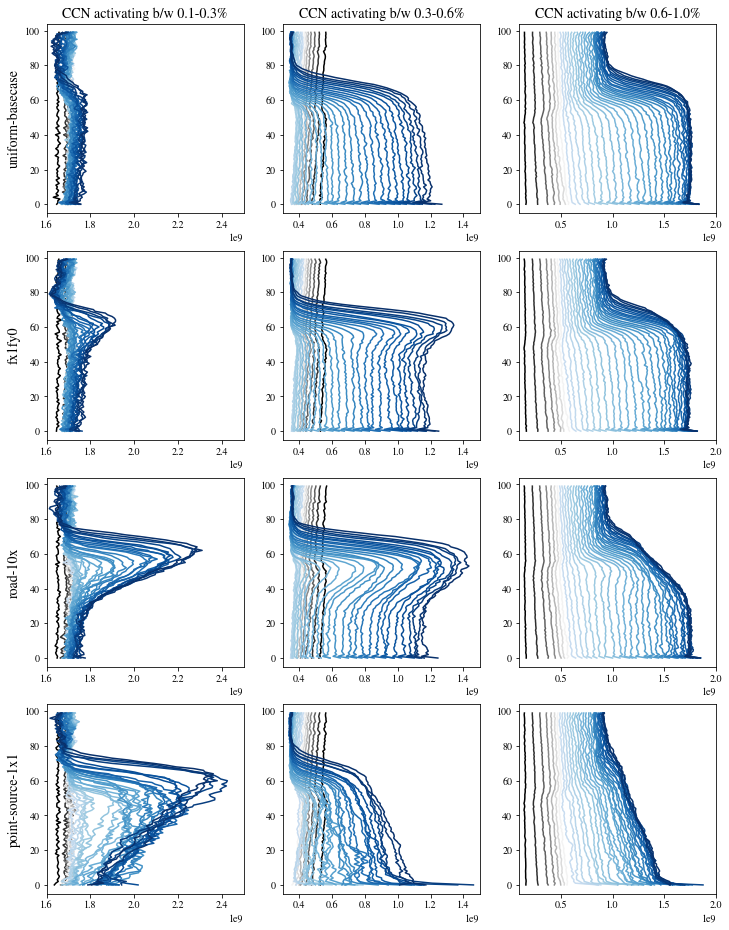

In [ ]:

scenarios = ['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1']
fig, ax = plt.subplots(len(scenarios), 3, figsize=(12, len(scenarios)*4))
colors = plt.cm.Blues(np.linspace(.05, 1, 36))
ic_colors = plt.cm.Greys_r(np.linspace(0, .9, 7))
for i, scenario in enumerate(scenarios):
    for (c, time) in zip(colors, np.arange(36)):
        if time > 6:
            inverse_airdens = Archive.aero_data[scenario]['ALT'][time, :, :, :]

            ccn_003_001_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_001'][time, :, :, :]).mean(axis=(1,2))
            ccn_006_003_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :]).mean(axis=(1,2))
            ccn_010_006_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_010'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :]).mean(axis=(1,2))

            alpha = time/36
            ax[i, 0].plot(ccn_003_001_diff, np.arange(100), label='0.1-0.3%', c=colors[time])
            ax[i, 1].plot(ccn_006_003_diff, np.arange(100), label='0.3-0.6%',  c=colors[time])
            ax[i, 2].plot(ccn_010_006_diff, np.arange(100), label='0.6-1.0%',  c=colors[time])
        else:
            inverse_airdens = Archive.aero_data[scenario]['ALT'][time, :, :, :]

            ccn_003_001_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_001'][time, :, :, :]).mean(axis=(1,2))
            ccn_006_003_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :]).mean(axis=(1,2))
            ccn_010_006_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_010'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :]).mean(axis=(1,2))

            alpha = 1- 4*time/36
            ax[i, 0].plot(ccn_003_001_diff, np.arange(100), label='0.1-0.3%', c=ic_colors[time])
            ax[i, 1].plot(ccn_006_003_diff, np.arange(100), label='0.3-0.6%', c=ic_colors[time])
            ax[i, 2].plot(ccn_010_006_diff, np.arange(100), label='0.6-1.0%', c=ic_colors[time])
    
    ax[i, 0].set_xlim(1.6e9, 2.5e9)
    ax[i, 1].set_xlim(.3e9, 1.5e9)
    ax[i, 2].set_xlim(1e8, 2e9)
    ax[i, 0].set_ylabel(f'{scenario}', fontsize=14)
ax[0, 0].set_title('CCN activating b/w 0.1-0.3%', fontsize=14)
ax[0, 1].set_title('CCN activating b/w 0.3-0.6%', fontsize=14)
ax[0, 2].set_title('CCN activating b/w 0.6-1.0%', fontsize=14)
#plt.legend()
#plt.xscale('log')

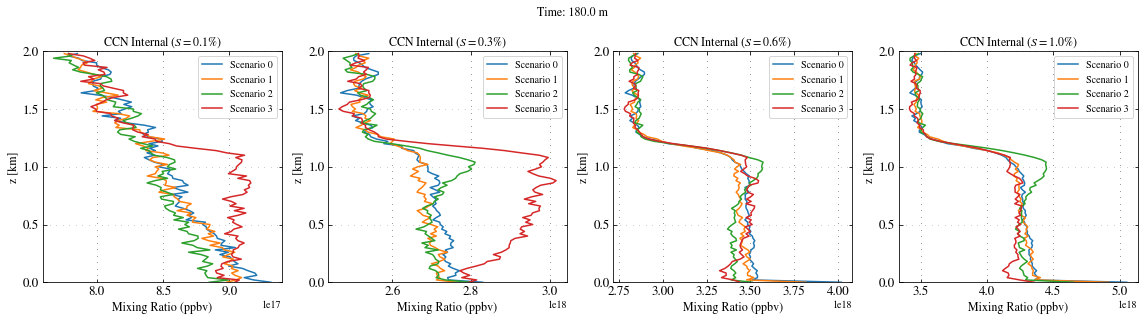

In [ ]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'#'point-source-10x10','point-source-10x10-tchem60', 
                                            ], variables=['ccn_internal_001', 'ccn_internal_003', 'ccn_internal_006','ccn_internal_010'
                                                                                          ], 
                                 time=18, 
                                 general_scenario_label=True
                                 )

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:77: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'),


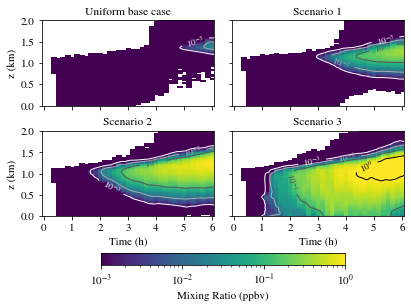

In [14]:
contourmin=-3
contourmax=0
ncontours=4

plotFourPanelZT(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'], variable='pmc_NO3', 
       vmin=1e-3, vmax=1e0, lognorm=True,
       xtick_delta_t=1, xtick_units='h', title='', 
       plot_contours=True, 
       contour_fmt=matplotlib.ticker.LogFormatterSciNotation(),
       contour_norm=mplcolors.LogNorm(10**contourmin, 10**contourmax),
       contour_levels=[x for x in np.logspace(contourmin,contourmax, ncontours) if x!= 0], 
       contour_label_fontsize=9, smooth_contours=True, contour_smoothing_sigma=.7, contour_linewidth=1,
       savefig=True
       )

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:68: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'), norm=contour_norm)


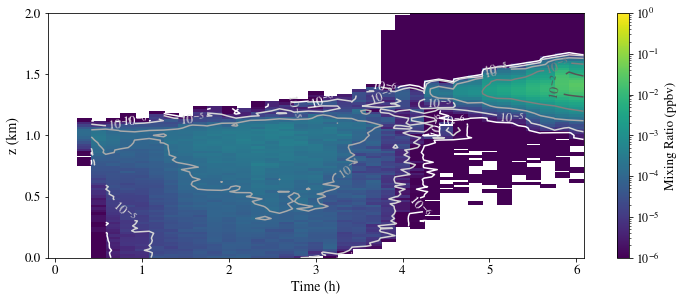

In [33]:
contourmin=-6
contourmax=0
ncontours=7

plotZT(scenario='uniform-basecase', variable='pmc_NO3', vmin=1e-6, vmax=1e0, lognorm=True,
       xtick_delta_t=1, xtick_units='h', title='',
       contour_fmt=matplotlib.ticker.LogFormatterSciNotation(),
       contour_norm=mplcolors.LogNorm(10**contourmin, 10**contourmax),
       contour_levels=[x for x in np.logspace(contourmin,contourmax, ncontours) if x!= 0], 
       plot_contours=True, 
       savefig=True
       )

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:68: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'), norm=contour_norm)


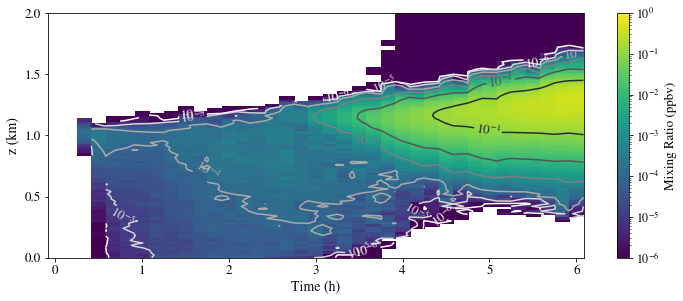

In [34]:
contourmin=-6
contourmax=0
ncontours=7

plotZT(scenario='fx1fy0', variable='pmc_NO3', vmin=1e-6, vmax=1e0, lognorm=True,
xtick_delta_t=1, xtick_units='h', title='',
       contour_fmt=matplotlib.ticker.LogFormatterSciNotation(),
       contour_norm=mplcolors.LogNorm(10**contourmin, 10**contourmax),
       plot_contours=True, contour_levels=[x for x in np.logspace(contourmin,contourmax, ncontours) if x!= 0],
       savefig=True 
       )

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:68: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'), norm=contour_norm)


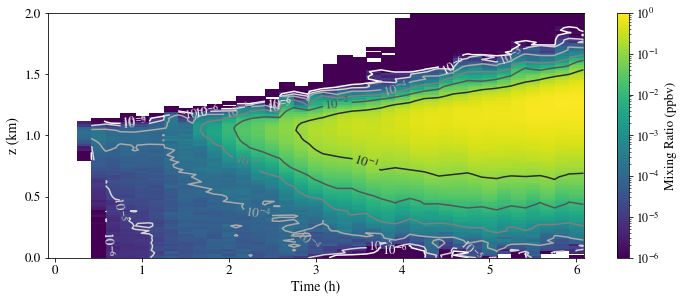

In [35]:
contourmin=-6
contourmax=0
ncontours=7

plotZT(scenario='road-10x', variable='pmc_NO3', vmin=1e-6, vmax=1e0, lognorm=True,
xtick_delta_t=1, xtick_units='h', title='',
       contour_fmt=matplotlib.ticker.LogFormatterSciNotation(),
       contour_norm=mplcolors.LogNorm(10**contourmin, 10**contourmax),
       plot_contours=True, contour_levels=[x for x in np.logspace(contourmin,contourmax, ncontours) if x!= 0],
       savefig=True 
       )

/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:68: UserWarning: Log scale: values of z <= 0 have been masked
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'), norm=contour_norm)


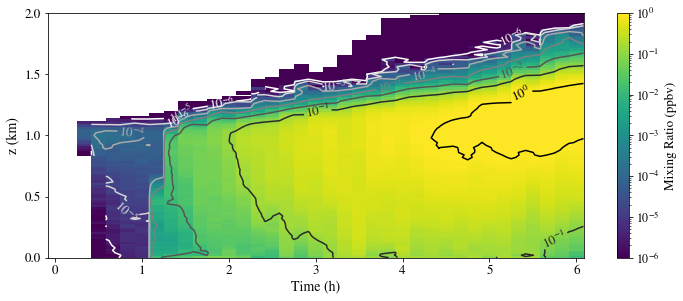

In [36]:
contourmin=-6
contourmax=0
ncontours=7

plotZT(scenario='point-source-1x1', variable='pmc_NO3', vmin=1e-6, vmax=1e0, lognorm=True,
xtick_delta_t=1, xtick_units='h', title='',
       contour_fmt=matplotlib.ticker.LogFormatterSciNotation(),
       contour_norm=mplcolors.LogNorm(10**contourmin, 10**contourmax),
       plot_contours=True, contour_levels=[x for x in np.logspace(contourmin,contourmax, ncontours) if x!= 0],
       savefig=True 
       )

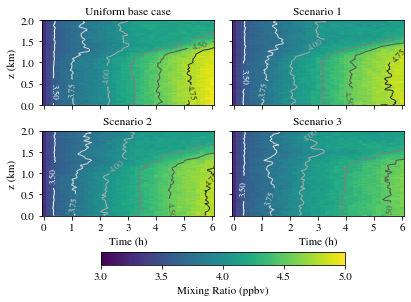

In [10]:
plotFourPanelZT(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'], variable='pmc_SO4', vmin=3, vmax=5,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=7, contour_min=3.5, contour_max=5,
       contour_label_fontsize=9, smooth_contours=True, contour_smoothing_sigma=.7, contour_linewidth=1,
       savefig=True
       )

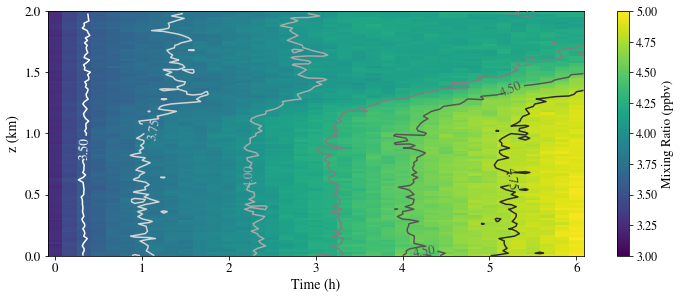

In [37]:
plotZT(scenario='uniform-basecase', variable='pmc_SO4', vmin=3, vmax=5,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=7, contour_min=3.5, contour_max=5,
       savefig=True
       )

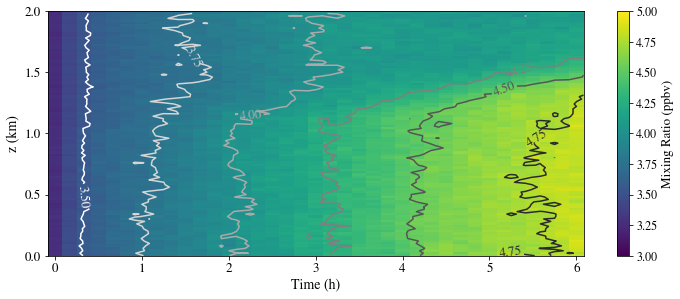

In [38]:
plotZT(scenario='fx1fy0', variable='pmc_SO4',vmin=3, vmax=5,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=7, contour_min=3.5, contour_max=5,
       savefig=True
       )

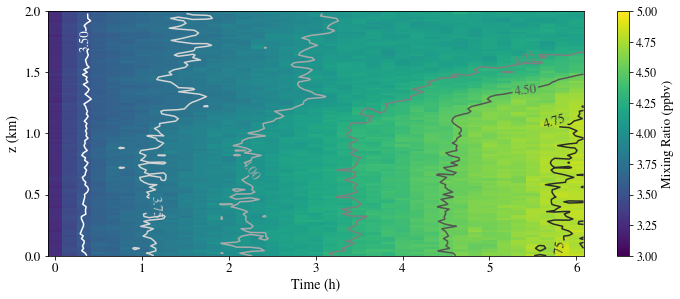

In [39]:
plotZT(scenario='road-10x', variable='pmc_SO4',vmin=3, vmax=5,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=7, contour_min=3.5, contour_max=5,
       savefig=True
       )

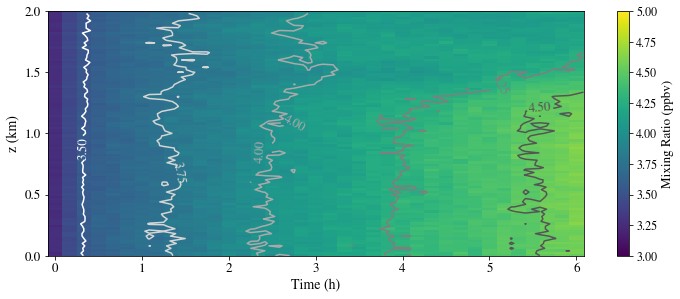

In [40]:
plotZT(scenario='point-source-1x1', variable='pmc_SO4',vmin=3, vmax=5,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=7, contour_min=3.5, contour_max=5,
       savefig=True
       )

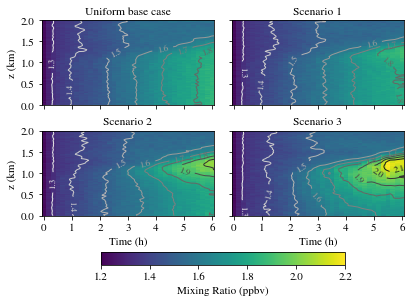

In [11]:
plotFourPanelZT(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'], variable='pmc_NH4', vmin=1.2, vmax=2.2,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=11, contour_min=1.2, contour_max=2.2,
       contour_label_fontsize=9, smooth_contours=True, contour_smoothing_sigma=.7, contour_linewidth=1,
       savefig=True
       )

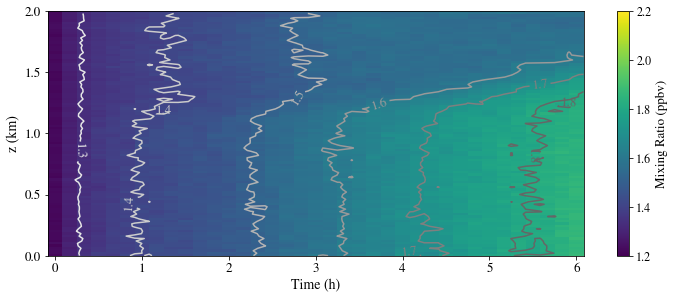

In [41]:
plotZT(scenario='uniform-basecase', variable='pmc_NH4', vmin=1.2, vmax=2.2,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=11, contour_min=1.2, contour_max=2.2,
       savefig=True
       )

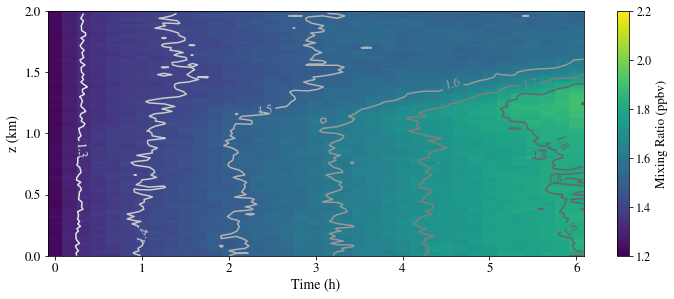

In [42]:
plotZT(scenario='fx1fy0', variable='pmc_NH4',vmin=1.2, vmax=2.2,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=11, contour_min=1.2, contour_max=2.2,
       savefig=True
       )

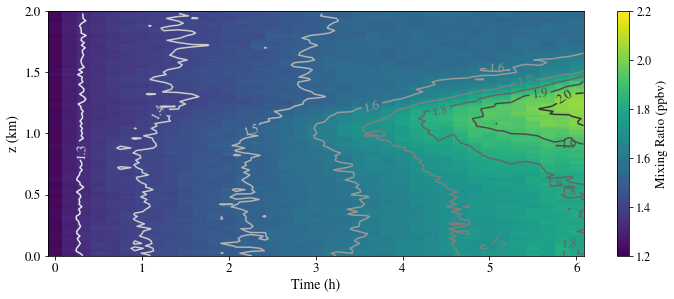

In [44]:
plotZT(scenario='road-10x', variable='pmc_NH4',vmin=1.2, vmax=2.2,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=11, contour_min=1.2, contour_max=2.2,
       savefig=True
       )

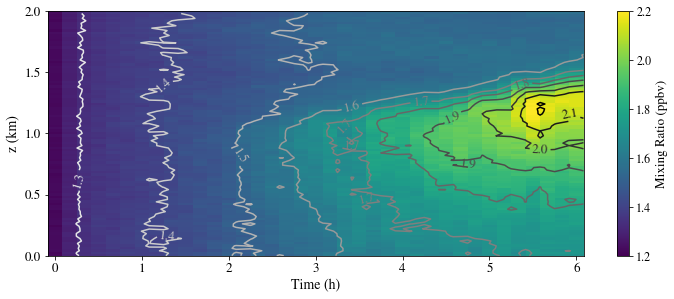

In [45]:
plotZT(scenario='point-source-1x1', variable='pmc_NH4',vmin=1.2, vmax=2.2,
       xtick_delta_t=1, xtick_units='h', title='', plot_contours=True, n_contours=11, contour_min=1.2, contour_max=2.2,
       savefig=True
       )

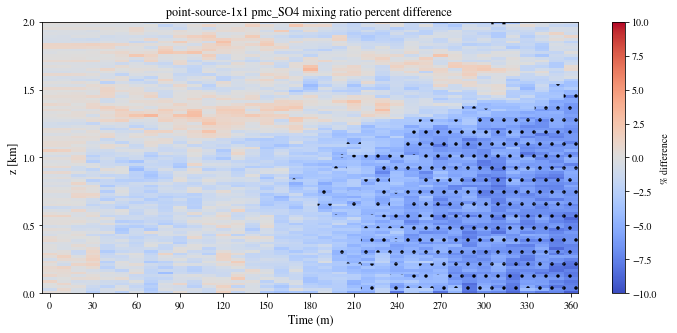

In [ ]:
variable = 'pmc_SO4'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

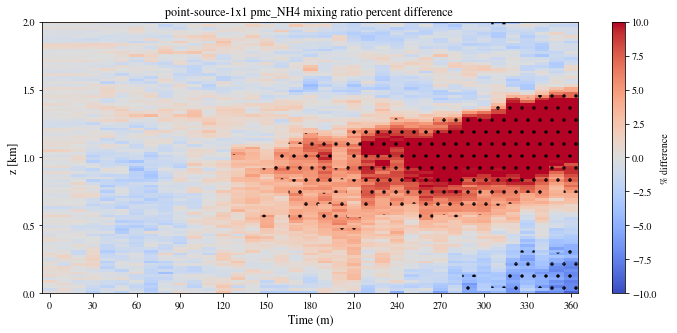

In [ ]:
variable = 'pmc_NH4'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

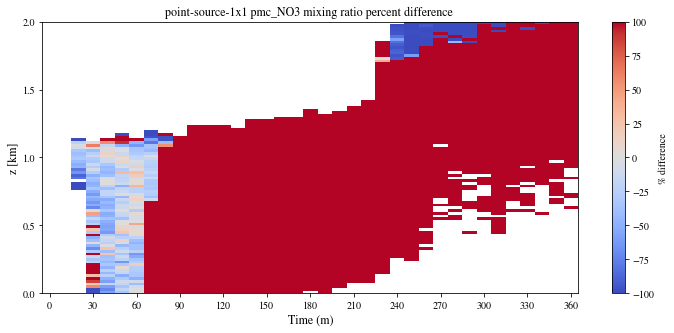

In [ ]:
variable = 'pmc_NO3'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-100, vmax=100, 
                   mixingratio=True)


In [ ]:
def plotVarPercentDiffContour(scenario, variable, vmin=None, vmax=None, mixingratio=False, skip_t0=False, **kwargs):
    
    rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0)
    
    ax = kwargs.get('ax', None)
    cmap = kwargs.get('cmap', None)
    if not cmap:
        cmap = plt.cm.coolwarm
    else:
        cmap = plt.get_cmap(cmap)
    
    if not ax:
        print('setting ax')
        fig, ax  = plt.subplots(1,1, figsize=(12,5))
    cs = ax.contourf(rel_diff.T, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(cs, label=f'{variable} percent difference', ax=ax)

    ax.set_xlabel('Time (mins)', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.linspace(0, Archive.n_times-1, 13))
    ax.set_xticklabels(5*np.linspace(0, Archive.n_times-1, 13))
    ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
    if mixingratio:
        mixingratio_str = 'mixing ratio '
    else:
        mixingratio_str = ''
    ax.set_title(f'{scenario} {variable} {mixingratio_str}percent difference ')
    contourmax = kwargs.get('contour_max', 15)
    contourmin = kwargs.get('contour_min', -15)
    ncontours = kwargs.get('n_contours', 9)
    contour_levels = [x for x in np.linspace(contourmin,contourmax, ncontours) if x!= 0]
    CS = ax.contour(rel_diff.T, levels=contour_levels, cmap='gist_gray_r')
    ax.clabel(CS, inline=True, fontsize=13)
    plt.tight_layout()

In [ ]:
scenario = 'point-source-1x1'
plotVarPercentDiffContour(scenario, variable, vmin=-8, vmax=8, 
                   mixingratio=True,contour_max=8, contour_min=-8, n_contours=7,#ax=ax[1], 
                   cmap='coolwarm')

In [ ]:
fig, ax  = plt.subplots(2,1, figsize=(12,8))
variable = 'ccn_006'
                          
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiffContour(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, contour_max=15, contour_min=-15, n_contours=7, ax=ax[0], cmap='coolwarm')

scenario = 'point-source-10x10'
plotVarPercentDiffContour(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True,contour_max=15, contour_min=-15, n_contours=7,ax=ax[1], cmap='coolwarm')

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-1x1'
plotNSHPercentDiff(scenario, variable, vmin=-1000, vmax=1000)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-10x10-tchem60'
plotNSHPercentDiff(scenario, variable, vmin=-1000, vmax=1000)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-1x1'
plotZT(scenario, variable, vmin=5e-7, vmax=2e-6, lognorm=True)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-10x10-tchem60'
plotZT(scenario, variable, vmin=5e-7, vmax=2e-6, lognorm=True)

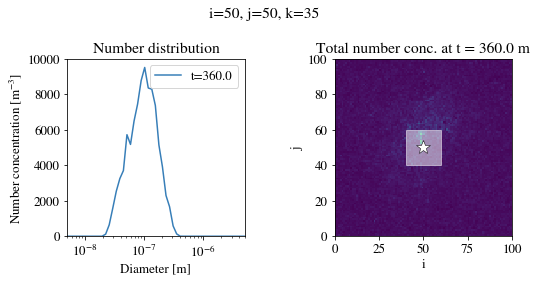

In [ ]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 35
plotNumberDist(scenario, i, j, k, times=[36], 
               ylims=(0, 10000), cmap='Set1',
               local_binning=10)

In [ ]:

def plotFourPanelDist(scenarios, i, j, k, dist_type, **kwargs):

    fig, ax = plt.subplots(2, 2, figsize=(6.5, 6.5))

    for ax, scenario in zip(ax.flatten(), scenarios):
        scenario_aerodata = Archive.aero_data[scenario]
        scenario_distdata = Archive.aerodist_data[scenario]

        # Configurable keyword arguments
        times = kwargs.get('times', np.arange(0, Archive.n_times+1, int(Archive.n_times/(60/Archive.historydelta_m))))
        xlims = kwargs.get('xlims', (5e-9, 5e-6))
        if dist_type == 'num':
            ylims = kwargs.get('ylims', (1e7, 1e10))
            scaling_factor = 1 # keep as # m^-3
        if dist_type == 'mass':
            ylims = kwargs.get('ylims', (0, 1e-13))
            scaling_factor=1e9 # convert to micrograms per cubic meter
        yscale = kwargs.get('yscale', 'linear')
        savefig = kwargs.get('savefig', True)
        totconctimeidx=kwargs.get('totconctimeidx', Archive.n_times-1)
        lognorm = kwargs.get('lognorm', False)
        if not isinstance(times, np.ndarray):
            times = np.array(times)
        dist_cmap_name = kwargs.get('dist_cmap', 'viridis')
        dist_cmap = plt.get_cmap(dist_cmap_name)
        dist_cmap_normrange = kwargs.get('dist_cmap_norm_range', (0.2, 0.9))
        title_size = kwargs.get('title_size', 10)
        label_size = kwargs.get('label_size', 9)
        local_binning = kwargs.get('local_binning', None)
        legend_loc = kwargs.get('legend_loc', 'upper left')
        legend_ncol = kwargs.get('legend_ncol', len(times))

        tot_conc_label = kwargs.get('field_var', f'TOT_{dist_type.upper()}_CONC')
        tot_conc_title = kwargs.get('field_title', None)

        colors = dist_cmap(np.linspace(dist_cmap_normrange[0], 
                                    dist_cmap_normrange[1], 
                                    times.size))
        for c, time in zip(colors, times):
            x_vals = []
            bin_vals = []

            bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
            bin_width = bin_edges[1:] - bin_edges[:-1]

            for bin_idx in range(100):
                bin_idx += 1 # 1 indexing 
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
                if local_binning:
                    bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                    bin_data = bin_data.mean()
                bin_vals.append(bin_data)
                x_vals.append(bin_idx)

            ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
                    label=f'h {(1/60)*Archive.historydelta_m*time:1.0f}', c=c, lw=1.5)
            ax.set_xscale('log')

        ax.set_xlim(xlims[0], xlims[1])
        ax.set_ylim(ylims[0], ylims[1])
        ylims = ax.get_ylim()
        if yscale == 'log':
            ax.set_yscale('log')
        ax.legend(loc=legend_loc, handlelength=1, ncol=legend_ncol, columnspacing=0.8)

        if dist_type == 'num':
            ax.set_ylabel('Number concentration (m$^{-3}$)', fontsize=label_size)
            ax.set_title(f'Number distribution', fontsize=title_size)
        if dist_type == 'mass':
            ax.set_ylabel('Mass concentration ($\mu$g m$^{-3}$)', fontsize=label_size)
            ax.set_title(f'Mass distribution', fontsize=title_size)

        ax.set_xlabel('Diameter (m)', fontsize=label_size)

        ax.grid(which = "major", linewidth = 0.7, axis='y', ls="dashed", dashes=(4,4), c='#414141', alpha=.5)
        ax.grid(which = "minor", linewidth = 0.7, axis='y', ls="dashed", dashes=(6,6), c='white')
        ax.grid(which = "minor", linewidth = 0.7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
        ax.grid(which = "major", linewidth = 0.7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
        ax.tick_params(axis='both', labelsize=label_size, which='major', direction='in', top=True, right=True, bottom=True, left=True)
        ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

    if savefig:
        plt.savefig(f'{scenario}_{dist_type}conc_i{i}_j{j}_k{k}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


In [63]:
def plot_ScenarioDists(dist_type='num', k=25, time=36, **kwargs):
    # Configurable keyword arguments
    xlims = kwargs.get('xlims', (5e-9, 5e-6))
    if dist_type == 'num':
        ylims = kwargs.get('ylims', (1e7, 1e10))
        scaling_factor = 1 # keep as # m^-3
    if dist_type == 'mass':
        ylims = kwargs.get('ylims', (0, 1e-13))
        scaling_factor=1e9 # convert to micrograms per cubic meter
    yscale = kwargs.get('yscale', 'linear')
    savefig = kwargs.get('savefig', True)
    totconctimeidx=kwargs.get('totconctimeidx', Archive.n_times-1)
    lognorm = kwargs.get('lognorm', False)
    dist_cmap_name = kwargs.get('dist_cmap', 'viridis')
    dist_cmap = plt.get_cmap(dist_cmap_name)
    dist_cmap_normrange = kwargs.get('dist_cmap_norm_range', (0.2, 0.9))
    title_size = kwargs.get('title_size', 10)
    label_size = kwargs.get('label_size', 9)
    local_binning = kwargs.get('local_binning', None)
    legend_loc = kwargs.get('legend_loc', 'upper left')
    legend_ncol = kwargs.get('legend_ncol', 2)

    tot_conc_label = kwargs.get('field_var', f'TOT_{dist_type.upper()}_CONC')
    tot_conc_title = kwargs.get('field_title', None)

    dist_ij_loc = {'uniform-basecase': [50, 50],
               'fx1fy0': [50, 25], # 25
               'road-10x': [50, 50],
               'point-source-1x1': [50, 50],
    }   
    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4))
    

    # plot initial condition
    scenario_aerodata = Archive.aero_data['uniform-basecase']
    scenario_distdata = Archive.aerodist_data['uniform-basecase']

    x_vals = []
    bin_vals = []
    bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]
    t0 = 0
    i, j = dist_ij_loc['uniform-basecase']
    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][t0, k, j, i].data.item()#/1e6
        if local_binning:
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][t0, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
            bin_data = bin_data.mean()
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)
    ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
            label=f'Initial Condition', c='k', ls='--')

    
        
    colors = Archive.getScenarioColors()
    labels = Archive.getScenarioGeneralLabels()
    for scenario in dist_ij_loc:
        scenario_aerodata = Archive.aero_data[scenario]
        scenario_distdata = Archive.aerodist_data[scenario]
        i, j = dist_ij_loc[scenario]
        c = colors[scenario]
        label = labels[scenario]
        
        x_vals = []
        bin_vals = []

        bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
        bin_width = bin_edges[1:] - bin_edges[:-1]

        for bin_idx in range(100):
            bin_idx += 1 # 1 indexing 
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
            if local_binning:
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                bin_data = bin_data.mean()
            bin_vals.append(bin_data)
            x_vals.append(bin_idx)

        ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
                label=f'{label}', c=c, lw=1.5)

    ax.set_xscale('log')

    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ylims = ax.get_ylim()
    if yscale == 'log':
        ax.set_yscale('log')

    #ax.legend(loc=legend_loc, handlelength=1, ncol=legend_ncol, columnspacing=0.8)

    if dist_type == 'num':
        ax.set_ylabel('Number concentration (m$^{-3}$)', fontsize=label_size)
        #ax.set_title(f'Number distribution', fontsize=title_size)
    if dist_type == 'mass':
        ax.set_ylabel('Mass concentration ($\mu$g m$^{-3}$)', fontsize=label_size)
        #ax.set_title(f'Mass distribution', fontsize=title_size)

    ax.set_xlabel('Diameter (m)', fontsize=label_size)

    ax.grid(which = "major", linewidth = 0.7, axis='y', ls="dashed", dashes=(4,4), c='#414141', alpha=.5)
    ax.grid(which = "minor", linewidth = 0.7, axis='y', ls="dashed", dashes=(6,6), c='white')
    ax.grid(which = "minor", linewidth = 0.7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.grid(which = "major", linewidth = 0.7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.tick_params(axis='both', labelsize=label_size, which='major', direction='in', top=True, right=True, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

    if savefig:
        plt.savefig(f'combined_{dist_type}conc_i{i}_j{j}_k{k}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


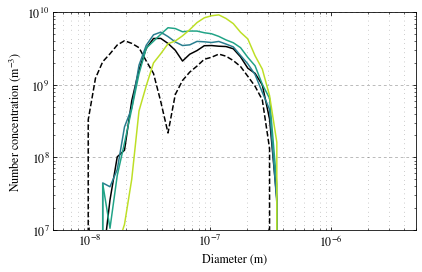

In [64]:
plot_ScenarioDists(dist_type='num', k=40, times=[36], local_binning=10, ylims=(1e7, 1e10), yscale='log',
legend_ncol=1, legend_loc='upper right', label_size=12, savefig=True)

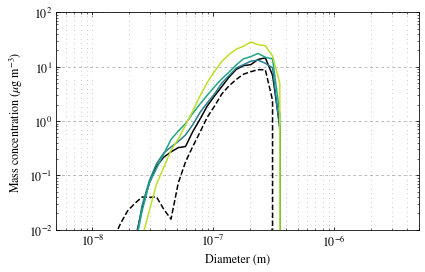

In [56]:
plot_ScenarioDists(dist_type='mass', k=40, times=[36], local_binning=10, ylims=(1e-2, 1e2), yscale='log',
legend_ncol=1, legend_loc='upper right', label_size=12,savefig=True)

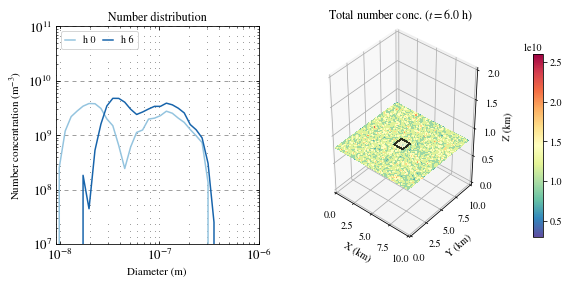

In [20]:
scenario = 'uniform-basecase'
i,j,k = 50, 50, 40
dist_type = 'num'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e7, 1e11), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

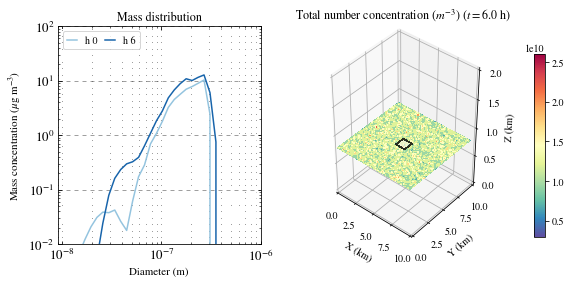

In [21]:
scenario = 'uniform-basecase'
i,j,k = 50, 50, 40
dist_type = 'mass'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e-2, 1e2), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

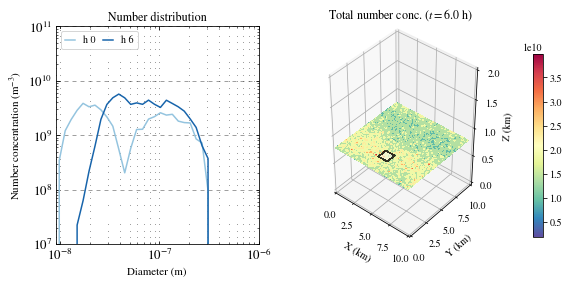

In [22]:
scenario = 'fx1fy0'
i,j,k = 50, 25, 40
dist_type = 'num'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e7, 1e11), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

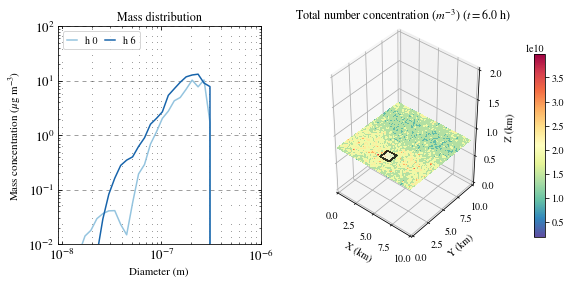

In [23]:
scenario = 'fx1fy0'
i,j,k = 50, 25, 40
dist_type = 'mass'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e-2, 1e2), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

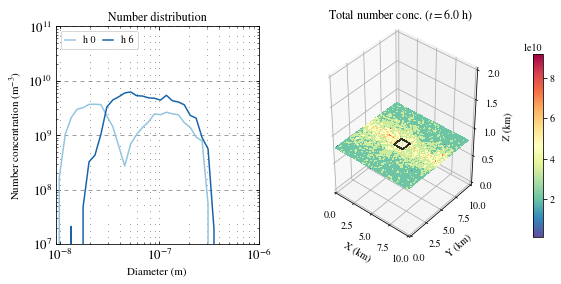

In [24]:
scenario = 'road-10x'
i,j,k = 50, 50, 40
dist_type = 'num'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e7, 1e11), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

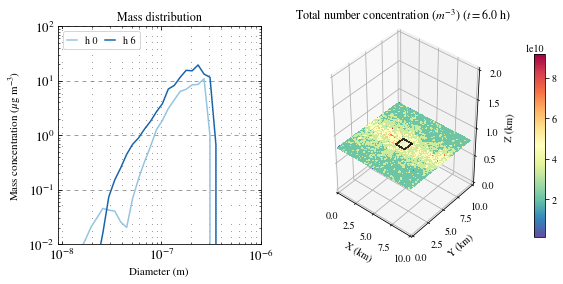

In [25]:
scenario = 'road-10x'
i,j,k = 50, 50, 40
dist_type = 'mass'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e-2, 1e2), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

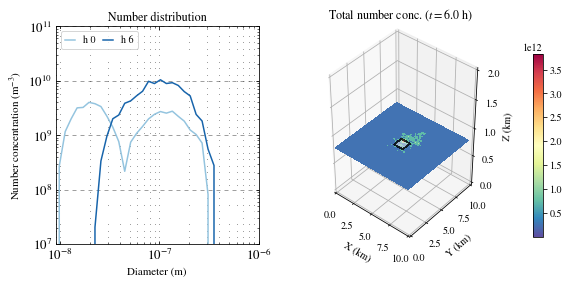

In [33]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 40
dist_type = 'num'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e7, 1e11), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=False)

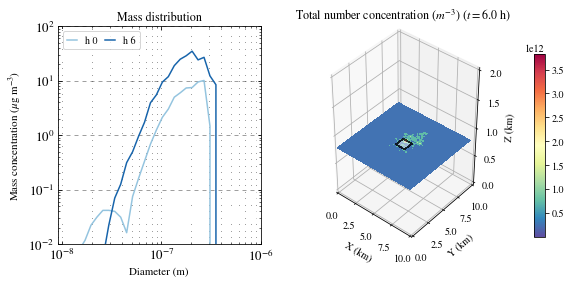

In [27]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 40
dist_type = 'mass'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e-2, 1e2), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=True)

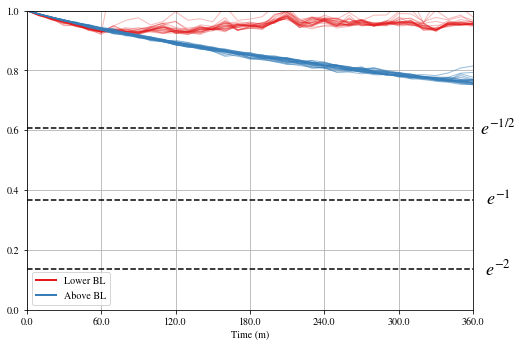

In [ ]:
plotTauCoag('point-source-1x1')

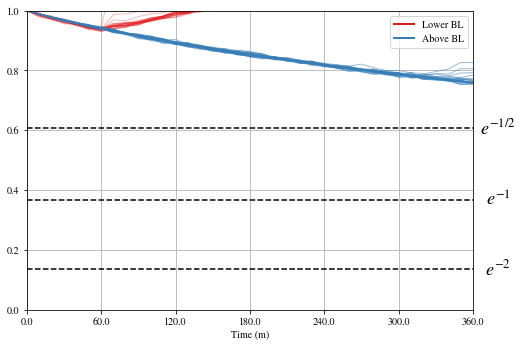

In [ ]:
plotTauCoag('uniform-basecase')

In [ ]:
scenarios = Archive.getScenarioList()
for scenario in scenarios:
    nsh_scenario = calculateNSHTimeSlice(scenario, variable='ch4')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


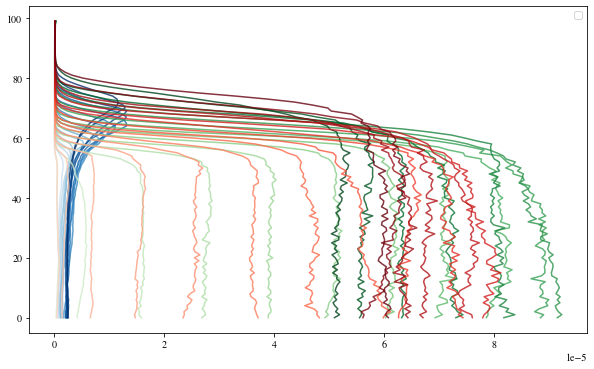

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for scenario in scenarios:
    if scenario == 'uniform-basecase':
        colors = plt.cm.Blues(np.linspace(0, 1, Archive.n_times))
    if scenario == 'road-10x':
        colors = plt.cm.Greens(np.linspace(0, 1, Archive.n_times))
    if scenario == 'point-source-1x1':
        colors = plt.cm.Reds(np.linspace(0, 1, Archive.n_times))
    for i in range(Archive.n_times)[::2]:
        if i < 6:
            continue
        vertical_slice = Archive.nsh_dict[scenario]['ch4'][i, :]
        ax.plot(vertical_slice, np.arange(100),c=colors[i], alpha=.8)#label=scenario)
    plt.legend()
    #plt.xscale('log')

so2 not in NSH dictionary for point-source-1x1, calculating


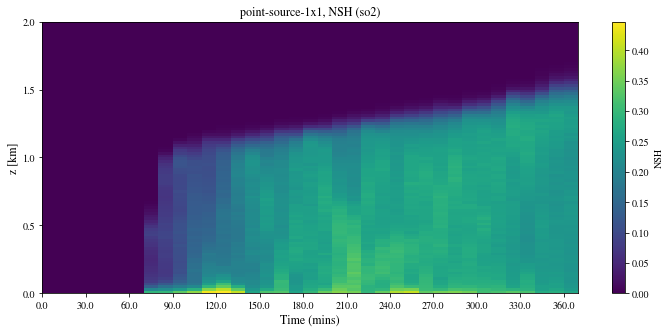

In [ ]:
plotNSH(scenario='point-source-1x1', variable='so2')

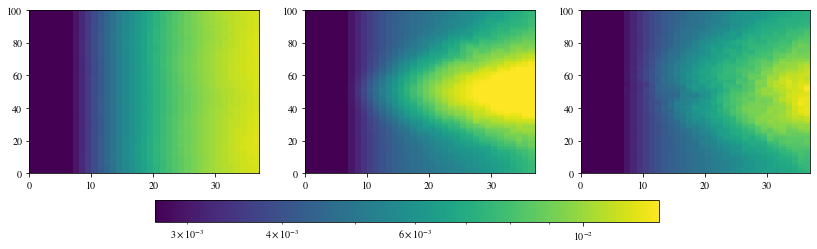

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))

var = 'hno3'
#var = 'nh3'
#var = 'so2'
#var='h2so4'
#var = 'oh'
#var = 'pmc_NO3'
#var = 'pmc_NH4'
#var = 'pmc_SO4'

z = 25

s0_data = Archive.aero_data['uniform-basecase'][var]
s1_data = Archive.aero_data['road-10x'][var]
s2_data = Archive.aero_data['point-source-1x1'][var]

vmin = s0_data[6:, z, :, :].mean(axis=1).min()
vmax = s2_data[6:, z, :, :].mean(axis=1).max()#*.7

if vmin == 0:
    vmin = 1e-12

ax[0].pcolormesh(s0_data[:, z, :, :].mean(axis=1).T, norm = mplcolors.LogNorm(vmin, vmax)
                 )

ax[1].pcolormesh(s1_data[:, z, :, :].mean(axis=2).T, norm = mplcolors.LogNorm(vmin, vmax)
                 )

c= ax[2].pcolormesh(s2_data[:, z, :, :].mean(axis=1).T, norm = mplcolors.LogNorm(vmin, vmax)
                 #norm = mplcolors.LogNorm(5.8e-4, 2.7e-3)
                 )

cbar_ax = fig.add_axes([0.25, -0.1, 0.5, 0.1])
fig.colorbar(c, cax=cbar_ax, orientation='horizontal')


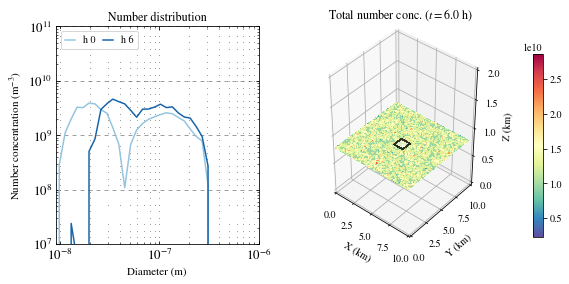

In [3]:
scenario = 'uniform-basecase-no-nh4'
i,j,k = 50, 50, 40
dist_type = 'num'
ndist_binned_vals = plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                                dist_cmap='Blues', dist_cmap_norm_range=(.4,.8),
                                times = [0, 36],
                                xlims=(9e-9, 1e-6),
                                ylims=(1e7, 1e11), yscale='log',
                                field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                                #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                                local_binning=5, 
                                subset_marker='.',
                                savefig=False)

In [51]:


def plotSizeDistNoNH4(i, j, k, dist_type, **kwargs):
    scenarios = ['uniform-basecase-no-nh4', 'point-source-1x1-no-nh4']

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4))

    times = kwargs.get('times', np.arange(0, Archive.n_times+1, int(Archive.n_times/(60/Archive.historydelta_m))))
    if not isinstance(times, np.ndarray):
            times = np.array(times)

    dist_cmap_name = kwargs.get('dist_cmap', 'viridis')
    dist_cmap = plt.get_cmap(dist_cmap_name)
    dist_cmap_normrange = kwargs.get('dist_cmap_norm_range', (0.2, 0.9))

    colors = dist_cmap(np.linspace(dist_cmap_normrange[0], 
                                    dist_cmap_normrange[1], 
                                    len(scenarios)))
    for c, scenario in zip(colors, scenarios):
        scenario_aerodata = Archive.aero_data[scenario]
        scenario_distdata = Archive.aerodist_data[scenario]

        
        # Configurable keyword arguments
        
        xlims = kwargs.get('xlims', (5e-9, 5e-6))
        if dist_type == 'num':
            ylims = kwargs.get('ylims', (1e7, 1e10))
            scaling_factor = 1 # keep as # m^-3
        if dist_type == 'mass':
            ylims = kwargs.get('ylims', (0, 1e-13))
            scaling_factor=1e9 # convert to micrograms per cubic meter
        yscale = kwargs.get('yscale', 'linear')
        savefig = kwargs.get('savefig', True)
        totconctimeidx=kwargs.get('totconctimeidx', Archive.n_times-1)
        lognorm = kwargs.get('lognorm', False)
        
        
        title_size = kwargs.get('title_size', 10)
        label_size = kwargs.get('label_size', 9)
        local_binning = kwargs.get('local_binning', None)
        legend_loc = kwargs.get('legend_loc', 'upper left')
        legend_ncol = kwargs.get('legend_ncol', len(times))

        tot_conc_label = kwargs.get('field_var', f'TOT_{dist_type.upper()}_CONC')
        tot_conc_title = kwargs.get('field_title', None)

        
        for time in times:
            x_vals = []
            bin_vals = []

            bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
            bin_width = bin_edges[1:] - bin_edges[:-1]

            for bin_idx in range(100):
                bin_idx += 1 # 1 indexing 
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
                if local_binning:
                    bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                    bin_data = bin_data.mean()
                bin_vals.append(bin_data)
                x_vals.append(bin_idx)

            ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
                    #label=f'{(1/60)*Archive.historydelta_m*time:1.0f} h', 
                    label=scenario,
                    c=c, lw=1.5)
            ax.set_xscale('log')

        ax.set_xlim(xlims[0], xlims[1])
        ax.set_ylim(ylims[0], ylims[1])
        ylims = ax.get_ylim()
        if yscale == 'log':
            ax.set_yscale('log')
        ax.legend(loc=legend_loc, handlelength=1, ncol=legend_ncol, columnspacing=0.8)

        if dist_type == 'num':
            ax.set_ylabel('Number concentration (m$^{-3}$)', fontsize=label_size)
            ax.set_title(f'Number distribution', fontsize=title_size)
        if dist_type == 'mass':
            ax.set_ylabel('Mass concentration ($\mu$g m$^{-3}$)', fontsize=label_size)
            ax.set_title(f'Mass distribution', fontsize=title_size)

        ax.set_xlabel('Diameter (m)', fontsize=label_size)

        ax.grid(which = "major", linewidth = 0.7, axis='y', ls="dashed", dashes=(4,4), c='#414141', alpha=.5)
        ax.grid(which = "minor", linewidth = 0.7, axis='y', ls="dashed", dashes=(6,6), c='white')
        ax.grid(which = "minor", linewidth = 0.7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
        ax.grid(which = "major", linewidth = 0.7, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
        ax.tick_params(axis='both', labelsize=label_size, which='major', direction='in', top=True, right=True, bottom=True, left=True)
        ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

    if savefig:
        plt.savefig(f'{scenario}_{dist_type}conc_i{i}_j{j}_k{k}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

Stronger coagulation in the point source case leads to lower number concentration - somehow does this effect sulfate concentration of average particle?

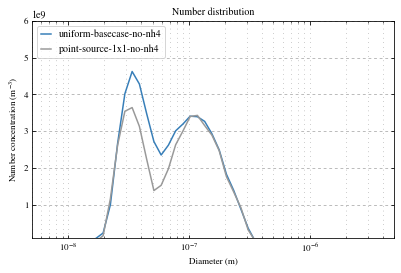

In [52]:
plotSizeDistNoNH4(i=50, j=50, k=25, times=[36], dist_type='num', local_binning=50, ylims=(1e8, .6e10), dist_cmap='Set1', savefig=False)

no not in NSH dictionary for point-source-1x1, calculating
co not in NSH dictionary for point-source-1x1, calculating


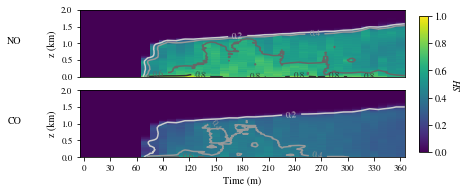

In [4]:
plotMultipleNSH(scenario='point-source-1x1', variables=['no', 'co'])

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.04083333,
        0.04416667, 0.04916667, 0.05583333, 0.1075    , 0.09333333,
        0.105     , 0.095     , 0.10166667, 0.08083333, 0.0525    ,
        0.0525    , 0.035     , 0.02416667, 0.0125    , 0.0075    ,
        0.00583333, 0.00666667, 0.00166667, 0.0025    , 0.00333333,
        0.00083333, 0.00083333, 0.        , 0.        , 0.        ]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

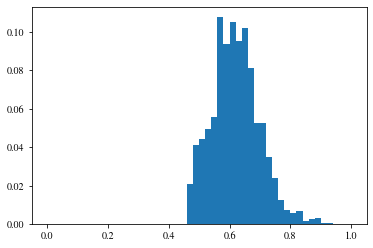

In [49]:
count_total = np.zeros((50))
for i in np.arange(12, 36):
    counts, bins = np.histogram(Archive.nsh_dict['point-source-1x1']['no'][i, :50], bins=np.linspace(0, 1, 51))
    count_total += counts
density = count_total/count_total.sum()
plt.hist(bins[1:], weights=density, bins=bins)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00083333,
        0.085     , 0.08333333, 0.08333333, 0.13916667, 0.16583333,
        0.16083333, 0.14583333, 0.08416667, 0.02583333, 0.01083333,
        0.00666667, 0.00333333, 0.00083333, 0.00083333, 0.00083333,
        0.        , 0.00083333, 0.00083333, 0.        , 0.00083333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

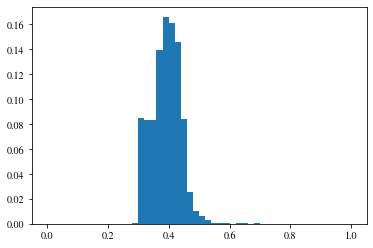

In [50]:
count_total = np.zeros((50))
for i in np.arange(12, 36):
    counts, bins = np.histogram(Archive.nsh_dict['point-source-1x1']['co'][i, :50], bins=np.linspace(0, 1, 51))
    count_total += counts
density = count_total/count_total.sum()
plt.hist(bins[1:], weights=density, bins=bins)